In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18, 5)})

In [2]:
# ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.arima_model import ARIMA # downgrade

c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read data & pre-setting

## Read data

In [3]:
df=pd.read_csv('lec17_bitcoin.txt', sep='\t')

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change
0,31-Mar-19,"4,102.30","4,111.80","4,121.90","4,082.20",2.43M,-23.0
1,30-Mar-19,"4,111.80","4,103.70","4,138.10","4,057.10",2.55M,23.0
2,29-Mar-19,"4,102.20","4,025.70","4,123.10","4,022.60",3.30M,190.0
3,28-Mar-19,"4,025.60","4,041.70","4,041.70","4,008.40",2.11M,-40.0
4,27-Mar-19,"4,041.70","3,942.80","4,043.30","3,936.20",2.78M,251.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    59 non-null     object 
 1   Price   59 non-null     object 
 2   Open    59 non-null     object 
 3   High    59 non-null     object 
 4   Low     59 non-null     object 
 5   Vol.    59 non-null     object 
 6   Change  59 non-null     float64
dtypes: float64(1), object(6)
memory usage: 3.4+ KB


In [6]:
df.shape

(59, 7)

## lower columns

In [7]:
# lower column names
df.columns=[col.lower() for col in df.columns]
df.head(1)

,date,price,open,high,low,vol.,change
0,31-Mar-19,"4,102.30","4,111.80","4,121.90","4,082.20",2.43M,-23.0


## transforming dtype
* replace에서 regex=True : regular expression 적용할 거냐는 의미

In [8]:
# 실패(컬럼이 나눠져서 나온다.)
# df['price'].str.extract('([0-9]*)[,]([0-9]*[.][0-9]*)')

In [9]:
# date
df['date']=df['date'].astype('datetime64[ns]')

In [10]:
# , 없애기
for col in df.columns:
    df[col]=df[col].replace(',','',regex=True)
df.head(1)

,date,price,open,high,low,vol.,change
0,2019-03-31,4102.30,4111.80,4121.90,4082.20,2.43M,-23.0


In [11]:
df['vol_temp']=df['vol.'].str.extract('[0-9]*[.][0-9]*([a-zA-Z]*)')
df['vol_temp'].value_counts()

M    35
K    24
Name: vol_temp, dtype: int64

In [12]:
# M, K 없애기 / 정규식 안 썼으면 regex=True 안 해도 없어진다.
df['vol.']=df['vol.'].replace('M','',regex=True)
df['vol.']=df['vol.'].replace('K','',regex=True)
df['vol.'].head()

0    2.43
1    2.55
2    3.30
3    2.11
4    2.78
Name: vol., dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      59 non-null     datetime64[ns]
 1   price     59 non-null     object        
 2   open      59 non-null     object        
 3   high      59 non-null     object        
 4   low       59 non-null     object        
 5   vol.      59 non-null     object        
 6   change    59 non-null     float64       
 7   vol_temp  59 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.8+ KB


In [14]:
df.head()

,date,price,open,high,low,vol.,change,vol_temp
0,2019-03-31,4102.30,4111.80,4121.90,4082.20,2.43,-23.0,M
1,2019-03-30,4111.80,4103.70,4138.10,4057.10,2.55,23.0,M
2,2019-03-29,4102.20,4025.70,4123.10,4022.60,3.30,190.0,M
3,2019-03-28,4025.60,4041.70,4041.70,4008.40,2.11,-40.0,M
4,2019-03-27,4041.70,3942.80,4043.30,3936.20,2.78,251.0,M


In [15]:
# import re
# for i in df['price'].index:
#     print(df.iloc[i,'price'])
#     m = re.match('[0-9]+[.][0-9]+', df.iloc[i,'price'])
#     print(m)

In [16]:
df=df.set_index('date')

### 강사님 방법
https://reakwon.tistory.com/172
강사님 코드 참고

In [17]:
# thousands -> read_csv할 때
# 정규표현식 버그 있다.
# 한 줄 for문도 있다.
# replace 정규표현식 상세한 내용도 참고

In [18]:
df=df.sort_values(by='date', ascending=True)
df.head()

,price,open,high,low,vol.,change,vol_temp
date,,,,,,,
2019-02-01,3467.90,3437.70,3485.70,3415.30,481.58,90.0,K
2019-02-02,3502.50,3467.90,3514.50,3447.80,443.60,100.0,K
2019-02-03,3459.10,3502.30,3507.80,3431.30,451.66,-124.0,K
2019-02-04,3462.80,3459.00,3479.70,3437.10,503.92,11.0,K
2019-02-05,3468.40,3463.00,3485.90,3450.30,460.95,16.0,K


In [20]:
col_list=df.columns[0:6]
df[col_list]=df[col_list].astype('float')

In [21]:
df.loc[df['vol_temp']=='M', 'vol']=df['vol.']*1000000
df.loc[df['vol_temp']=='K', 'vol']=df['vol.']*1000

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-02-01 to 2019-03-31
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     59 non-null     float64
 1   open      59 non-null     float64
 2   high      59 non-null     float64
 3   low       59 non-null     float64
 4   vol.      59 non-null     float64
 5   change    59 non-null     float64
 6   vol_temp  59 non-null     object 
 7   vol       59 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.2+ KB


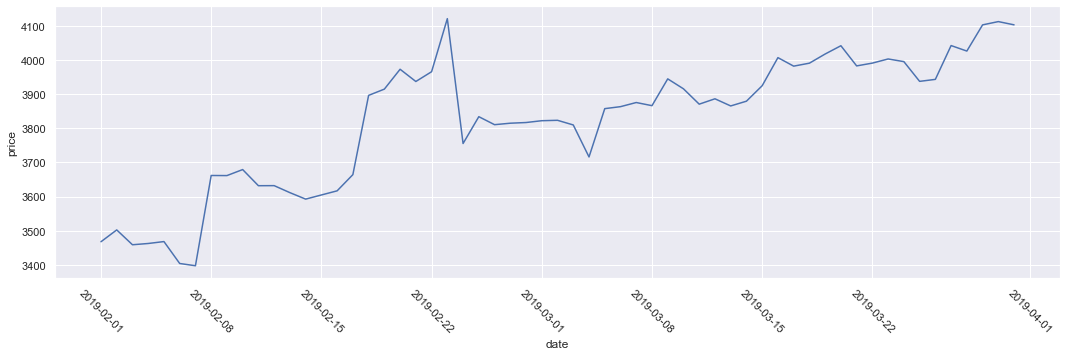

In [23]:
# EDA

ax=sns.lineplot(x='date', y='price', data=df)
plt.xticks(rotation = - 45 )

plt.show()

* 비정상성 데이터 : 시간변화에 따라 평균, 분산이 일정하지 않음

# statsmodels -> R에 있는 통계패키지 일부

In [ ]:
# ! pip install statsmodels

* https://pypi.org/project/statsmodels/
* https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html


In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

* AR : PACF (p) : p=1
* MA : ACF (q)  : q=0
* ARIMA(p,d,q)

* https://otexts.com/fppkr/non-seasonal-arima.html


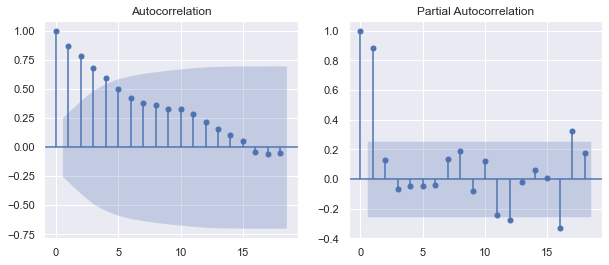

In [25]:
f, axes=plt.subplots(1,2, figsize=(10,4))
plot_acf(df['price'], ax=axes[0])
plot_pacf(df['price'], ax=axes[1])
plt.show()

* AR 경향을 보인다. -> 1차분 하면 되겠다.(1 다음부터는 정상성을 보여서)

### 데이터 1차분

In [26]:
df['price2']=df['price'].diff(1)  # 전일 것과 당일 것(하루 차이)  --> 나중에는 rolling 더 많이 씀
                                  # / 주차별 차분은 5(토,일 휴장이라)
df.head()

,price,open,high,low,vol.,change,vol_temp,vol,price2
date,,,,,,,,,
2019-02-01,3467.9,3437.7,3485.7,3415.3,481.58,90.0,K,481580.0,NaN
2019-02-02,3502.5,3467.9,3514.5,3447.8,443.60,100.0,K,443600.0,34.6
2019-02-03,3459.1,3502.3,3507.8,3431.3,451.66,-124.0,K,451660.0,-43.4
2019-02-04,3462.8,3459.0,3479.7,3437.1,503.92,11.0,K,503920.0,3.7
2019-02-05,3468.4,3463.0,3485.9,3450.3,460.95,16.0,K,460950.0,5.6


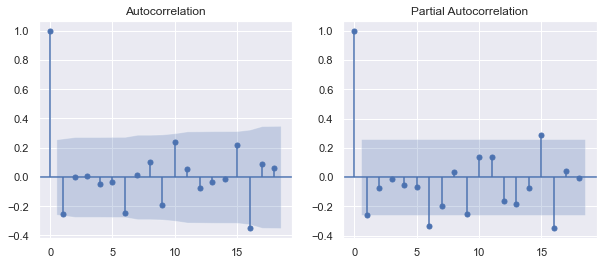

In [27]:
f, axes=plt.subplots(1,2, figsize=(10,4))
plot_acf(df.iloc[1:]['price2'], ax=axes[0])      # iloc[1:] : 첫째날은 전날 데이터가 없기 때문  / 차분하려면 이전 기 데이터도 가져와야 함.
plot_pacf(df.iloc[1:]['price2'], ax=axes[1])
plt.show()

# 완만해졌다.

<pre>
* ARIMA(p,d,q) : ARIMA(1,1,0)
* PACF 차트를 통해 1차푼 한 결과 정상성의 데이터를 보였다. == p=1
* I : 데이터를 1차분하면 정상성의 데이터를 보였다. == d=1
* ACF 차트는 완만한 경사를 보였다. -> MA 성격의 데이터는 아니다. == q=0

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(df['price'], order=(1,1,1), freq='D')
fitres=model.fit()
print(fitres.summary()) # 회귀 결과표

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -332.783
Method:                       css-mle   S.D. of innovations             73.532
Date:                Tue, 08 Feb 2022   AIC                            673.566
Time:                        10:20:08   BIC                            681.807
Sample:                    02-02-2019   HQIC                           676.776
                         - 03-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9838      1.651      6.048      0.000       6.748      13.219
ar.L1.D.price     0.6948      0.099      6.991      0.000       0.500       0.890
ma.L1.D.price    -0.9999      0.057    -

* P>|z| : t-test
* t-test < 0.05(유의수준): 유의하다.

In [31]:
pred=fitres.forecast(steps=3) # steps: n기 후 데이터 예측해봐
print(pred) # 예측 (2019-04-01) - (2019-03-31)

(array([4114.74095697, 4126.43202256, 4137.60205018]), array([73.53182574, 89.54195665, 96.3252786 ]), array([[3970.62122681, 4258.86068714],
       [3950.93301242, 4301.93103269],
       [3948.80797333, 4326.39612704]]))


In [ ]:
# df.iloc[-3:-1]

In [ ]:
# 